In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from matplotlib import pyplot as py
import io
from google.colab import files

In [48]:
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['healthcare-dataset-stroke-data.csv']))

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


In [49]:
data["Residence_type"] = data["Residence_type"].apply(lambda x: 1 if x == "Urban" else 0)
data["ever_married"] = data["ever_married"].apply(lambda x: 1 if x == "Yes" else 0)
data["gender"] = data["gender"].apply(lambda x: 1 if x == "Male" else 0)
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
data = pd.get_dummies(data=data, columns=['smoking_status', 'work_type'])

In [50]:
std = StandardScaler()
columns = ['avg_glucose_level', 'bmi', 'age']
data[columns] = std.fit_transform(data[['avg_glucose_level', 'bmi', 'age']])

In [51]:
print("Data shape : ", data.shape)
print("stroke Data : ", sum(data.stroke == 1))
print("stroke Data : ", sum(data.stroke == 0))

Data shape :  (5110, 19)
stroke Data :  249
stroke Data :  4861


In [52]:
data.drop(columns='id', axis=1, inplace=True)

In [53]:
X = data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
          'Residence_type', 'avg_glucose_level', 'bmi',
          'smoking_status_Unknown', 'smoking_status_formerly smoked',
          'smoking_status_never smoked', 'smoking_status_smokes',
          'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
          'work_type_Self-employed', 'work_type_children']].values
y = data['stroke'].values

In [54]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, random_state = 7)

In [56]:
print("\n\n")
print("=" * 80)
print("=" * 15, "Logistic Regression", "=" * 15)
print("=" * 80)
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train,y_train)




=============== Logistic Regression ===============


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_pred=logreg.predict(X_test)

In [58]:
logisticRegression_training_score = logreg.score(X_train,y_train)
logisticRegression_testing_score = logreg.score(X_test,y_test)

In [59]:
print('\nTraining Score %.2f' %logisticRegression_training_score)
print('Testing Score %.2f' %logisticRegression_testing_score) 
print("\n confusion_matrix: \n", confusion_matrix(y_test, y_pred))
print("\n classification_report: \n", classification_report(y_test, y_pred, zero_division=True))


Training Score 0.79
Testing Score 0.80

 confusion_matrix: 
 [[ 908  271]
 [ 216 1036]]

 classification_report: 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      1179
           1       0.79      0.83      0.81      1252

    accuracy                           0.80      2431
   macro avg       0.80      0.80      0.80      2431
weighted avg       0.80      0.80      0.80      2431



In [60]:
acc = accuracy_score(y_test,y_pred)
accuracy = acc*100
print("%.2f"%accuracy + "%")

79.97%


In [61]:
print("\n\n")
print("=" * 80)
print("=" * 15, "Random Forest Classifier", "=" * 15)
print("=" * 80)
clf=RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)




=============== Random Forest Classifier ===============


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [62]:
y_pred = clf.predict(X_test)

In [63]:
training_score_randomForest = clf.score(X_train,y_train)
testing_score_randomForest = clf.score(X_test,y_test)

In [64]:
print('\n Training Score', training_score_randomForest)
print('Testing Score %.2f' %testing_score_randomForest) 
print("\n confusion_matrix : \n", confusion_matrix(y_test, y_pred))
print("\n classification_report : \n", classification_report(y_test, y_pred, zero_division=True))


 Training Score 1.0
Testing Score 0.96

 confusion_matrix : 
 [[1135   44]
 [  44 1208]]

 classification_report : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1179
           1       0.96      0.96      0.96      1252

    accuracy                           0.96      2431
   macro avg       0.96      0.96      0.96      2431
weighted avg       0.96      0.96      0.96      2431



In [65]:
acc = accuracy_score(y_test,y_pred)
accuracy = acc*100
print("%.2f"%accuracy + "%")

96.38%


In [66]:
print("\n\n")
print("=" * 80)
print("=" * 15, "SVM", "=" * 15)
print("=" * 80)
svc = SVC(random_state=0, kernel='linear', gamma='auto',C=1)
svc.fit(X_train, y_train)




=============== SVM ===============


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [67]:
svc_score = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)

In [68]:
y_pred = svc.predict(X_test)

In [69]:
print('\n Training Score %.2f' %svc_score)
print('Testing Score %.2f' %svc_test)
print("\n confusion_matrix : \n", confusion_matrix(y_test, y_pred))
print("\n classification_report : \n", classification_report(y_test, y_pred, zero_division=True))


 Training Score 0.79
Testing Score 0.80

 confusion_matrix : 
 [[ 882  297]
 [ 189 1063]]

 classification_report : 
               precision    recall  f1-score   support

           0       0.82      0.75      0.78      1179
           1       0.78      0.85      0.81      1252

    accuracy                           0.80      2431
   macro avg       0.80      0.80      0.80      2431
weighted avg       0.80      0.80      0.80      2431



In [70]:
auc = roc_auc_score(y_test,y_pred)
print("%.2f"%auc + "%")

0.80%


In [71]:
print("\n\n")
print("=" * 80)
print("=" * 35, "XGBOOST", "=" * 35)
print("=" * 80)
xgboost = GradientBoostingClassifier(random_state=0)
xgboost.fit(X_train, y_train)




=================================== XGBOOST ===================================


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [72]:
xgboost_score = xgboost.score(X_train, y_train)
xgboost_test = xgboost.score(X_test, y_test)

In [73]:
y_pred = xgboost.predict(X_test)

In [74]:
print('\n Training Score %.2f' %xgboost_score)
print('Testing Score %.2f' %xgboost_test)
print("\n confusion_matrix : \n", confusion_matrix(y_test, y_pred))
print("\n classification_report : \n", classification_report(y_test, y_pred))


 Training Score 0.92
Testing Score 0.92

 confusion_matrix : 
 [[1072  107]
 [  92 1160]]

 classification_report : 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      1179
           1       0.92      0.93      0.92      1252

    accuracy                           0.92      2431
   macro avg       0.92      0.92      0.92      2431
weighted avg       0.92      0.92      0.92      2431



In [75]:
auc = roc_auc_score(y_test,y_pred)
print("%.2f"%auc + "%")

0.92%


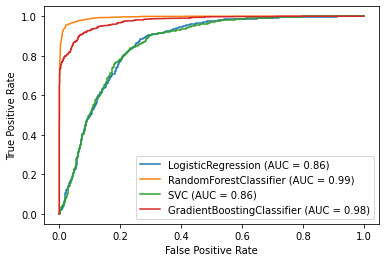

In [85]:
ax = py.gca()
logistic_display = plot_roc_curve(logreg,X_test,y_test,ax=ax)
rfc_disp = plot_roc_curve(clf, X_test, y_test,ax=ax)
svc_disp = plot_roc_curve(svc, X_test, y_test,ax=ax)
xgboost_disp = plot_roc_curve(xgboost, X_test, y_test,ax=ax)
py.show()